<a href="https://colab.research.google.com/github/narejoneduet/narejoneduet/blob/main/Loss_Algorthm_Computational_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

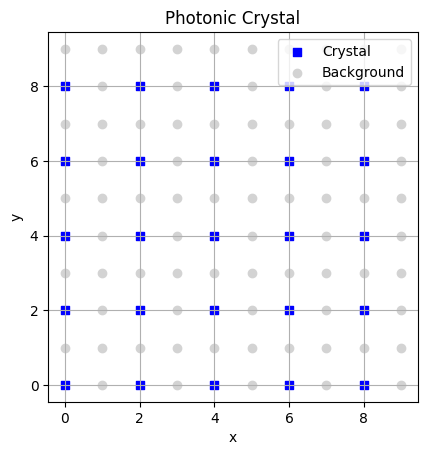

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0  # Lattice constant
n = 10  # Number of lattice points along each axis

# Create the lattice points
x_coords = np.arange(0, n) * a
y_coords = np.arange(0, n) * a
X, Y = np.meshgrid(x_coords, y_coords)

# Create a pattern for the crystal structure
crystal_structure = np.zeros((n, n), dtype=bool)
crystal_structure[::2, ::2] = True  # Simple example: every other point is part of the crystal

# Plotting
plt.figure()
plt.scatter(X[crystal_structure], Y[crystal_structure], color='blue', marker='s', label='Crystal')
plt.scatter(X[~crystal_structure], Y[~crystal_structure], color='lightgray', marker='o', label='Background')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Photonic Crystal')
plt.gca().set_aspect('equal')
plt.legend()
plt.grid(True)
plt.show()


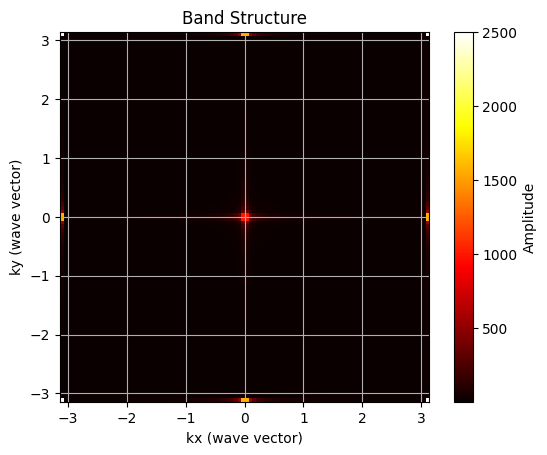

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0  # Lattice constant
n = 100  # Number of points in the Brillouin zone
k_values = np.linspace(-np.pi/a, np.pi/a, n)  # k-values in the Brillouin zone

# Create the lattice points
x_coords = np.arange(0, n) * a
y_coords = np.arange(0, n) * a
X, Y = np.meshgrid(x_coords, y_coords)

# Create a pattern for the crystal structure
crystal_structure = np.zeros((n, n), dtype=bool)
crystal_structure[::2, ::2] = True  # Simple example: every other point is part of the crystal

# Calculate the Fourier coefficients for the crystal structure
factors = np.exp(-1j * (X * np.pi/a + Y * np.pi/a))

# Initialize the band structure
band_structure = np.zeros((n, n))

# Calculate the energy dispersion relation (band structure)
for i, kx in enumerate(k_values):
    for j, ky in enumerate(k_values):
        phase_factors = np.exp(1j * (kx * X + ky * Y))
        field = crystal_structure * factors * phase_factors
        band_structure[i, j] = np.abs(np.sum(field))

# Plotting
plt.figure()
plt.imshow(band_structure.T, origin='lower', extent=(-np.pi/a, np.pi/a, -np.pi/a, np.pi/a), cmap='hot')
plt.colorbar(label='Amplitude')
plt.xlabel('kx (wave vector)')
plt.ylabel('ky (wave vector)')
plt.title('Band Structure')
plt.grid(True)
plt.show()


In [15]:
import numpy as np

# Define the parameters
density = 2.7  # Density of the crystal (ρ)
specific_heat_capacity = 0.5  # Specific heat capacity of the crystal (cp)
refractive_index_at_reference_temp = 1.5  # Refractive index of the crystal at reference temperature (n)
reference_temp = 25  # Reference temperature (T)
wavelength = 500  # Wavelength of the incident light
permittivity = 8.85 * 10**-12  # Permittivity of free space
permeability = 4 * np.pi * 10**-7  # Permeability of free space

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the scattering cross sections
oscillator_strengths = np.array([0.2, 0.3, 0.4])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (3 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Density of the crystal:", density)
print("Specific heat capacity of the crystal:", specific_heat_capacity)
print("Refractive index coefficient:", refractive_index_coefficient)
print("Absorbed light:", absorbed_light)
print("Scattered light:", scattered_light)
print("Heat generated in the crystal:", heat_generated)
print("Temperature rise in the crystal:", temperature_rise)
print("Change in refractive index:", refractive_index_change)
print("Change in direction of the incident light:", refracted_angle)
print("Transmitted light:", transmitted_light)
print("Absorbed light due to scattering:", absorbed_light_scattering)


Density of the crystal: 2.7
Specific heat capacity of the crystal: 0.5
Refractive index coefficient: 0.02
Absorbed light: 6.551917941477655e+29
Scattered light: 2.0855402542372887e+29
Heat generated in the crystal: 1.769017844198967e+30
Temperature rise in the crystal: 1.310383588295531e+30
Change in refractive index: 2.620767176591062e+28
Change in direction of the incident light: 0.3398369094541219
Transmitted light: 1.1489605903367705e+32
Absorbed light due to scattering: 2.0855402542372887e+29


In [16]:
import numpy as np

# Define the parameters
density = 2330  # Density of silicon (kg/m^3)
specific_heat_capacity = 700  # Specific heat capacity of silicon (J/kg·K)
refractive_index_at_reference_temp = 3.5  # Refractive index of silicon at reference temperature (n)
reference_temp = 25  # Reference temperature (°C)
wavelength = 500 * 10**-9  # Wavelength of the incident light (m)
permittivity = 8.85 * 10**-12  # Permittivity of free space (F/m)
permeability = 4 * np.pi * 10**-7  # Permeability of free space (H/m)

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the scattering cross sections
oscillator_strengths = np.array([0.2, 0.3, 0.4])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (3 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Density of the crystal:", density)
print("Specific heat capacity of the crystal:", specific_heat_capacity)
print("Refractive index coefficient:", refractive_index_coefficient)
print("Absorbed light:", absorbed_light)
print("Scattered light:", scattered_light)
print("Heat generated in the crystal:", heat_generated)
print("Temperature rise in the crystal:", temperature_rise)
print("Change in refractive index:", refractive_index_change)
print("Change in direction of the incident light:", refracted_angle)
print("Transmitted light:", transmitted_light)
print("Absorbed light due to scattering:", absorbed_light_scattering)


Density of the crystal: 2330
Specific heat capacity of the crystal: 700
Refractive index coefficient: 0.1
Absorbed light: 6.551917941477659e-07
Scattered light: 2.0855402542372896e-07
Heat generated in the crystal: 0.0015265968803642946
Temperature rise in the crystal: 9.359882773539514e-10
Change in refractive index: 9.359882773539515e-11
Change in direction of the incident light: 0.14334756890536535
Transmitted light: 8.61540973742457e-08
Absorbed light due to scattering: 2.0855402542372896e-07


In [17]:
import numpy as np

# Define the parameters
density = 5360  # Density of GaAs (kg/m^3)
specific_heat_capacity = 350  # Specific heat capacity of GaAs (J/kg·K)
refractive_index_at_reference_temp = 3.5  # Refractive index of GaAs at reference temperature (n)
reference_temp = 25  # Reference temperature (°C)
wavelength = 500 * 10**-9  # Wavelength of the incident light (m)
permittivity = 8.85 * 10**-12  # Permittivity of free space (F/m)
permeability = 4 * np.pi * 10**-7  # Permeability of free space (H/m)

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the scattering cross sections
oscillator_strengths = np.array([0.2, 0.3, 0.4])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (3 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Amount of light absorbed by the crystal due to scattering:", absorbed_light_scattering)
print("Amount of heat generated in the crystal due to absorption:", heat_generated)
print("Temperature rise in the crystal due to heat generation:", temperature_rise)
print("Change in refractive index of the crystal due to temperature rise:", refractive_index_change)
print("Change in direction of the incident light due to refraction:", refracted_angle)
print("Amount of light transmitted through the crystal:", transmitted_light)


Amount of light absorbed by the crystal due to scattering: 2.0855402542372896e-07
Amount of heat generated in the crystal due to absorption: 0.0035118280166320254
Temperature rise in the crystal due to heat generation: 1.8719765547079027e-09
Change in refractive index of the crystal due to temperature rise: 1.871976554707903e-10
Change in direction of the incident light due to refraction: 0.14334756890536535
Amount of light transmitted through the crystal: 1.723081947484914e-07


In [18]:
import numpy as np

# Define the parameters
density = 2200  # Density of SiO2 (kg/m^3)
specific_heat_capacity = 703  # Specific heat capacity of SiO2 (J/kg·K)
refractive_index_at_reference_temp = 1.45  # Refractive index of SiO2 at reference temperature (n)
reference_temp = 25  # Reference temperature (°C)
wavelength = 500 * 10**-9  # Wavelength of the incident light (m)
permittivity = 8.85 * 10**-12  # Permittivity of free space (F/m)
permeability = 4 * np.pi * 10**-7  # Permeability of free space (H/m)

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the scattering cross sections
oscillator_strengths = np.array([0.2, 0.3, 0.4])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (3 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Amount of light absorbed by the crystal due to scattering:", absorbed_light_scattering)
print("Amount of heat generated in the crystal due to absorption:", heat_generated)
print("Temperature rise in the crystal due to heat generation:", temperature_rise)
print("Change in refractive index of the crystal due to temperature rise:", refractive_index_change)
print("Change in direction of the incident light due to refraction:", refracted_angle)
print("Amount of light transmitted through the crystal:", transmitted_light)


Amount of light absorbed by the crystal due to scattering: 2.0855402542372896e-07
Amount of heat generated in the crystal due to absorption: 0.001441421947125085
Temperature rise in the crystal due to heat generation: 9.319940172798946e-10
Change in refractive index of the crystal due to temperature rise: 1.67758923110381e-11
Change in direction of the incident light due to refraction: 0.3520550993090037
Amount of light transmitted through the crystal: 8.135929546855421e-08


In [19]:
import numpy as np

# Define the parameters
density = 4200  # Density of TiO2 (kg/m^3)
specific_heat_capacity = 710  # Specific heat capacity of TiO2 (J/kg·K)
refractive_index_at_reference_temp = 2.55  # Refractive index of TiO2 at reference temperature (n)
reference_temp = 25  # Reference temperature (°C)
wavelength = 500 * 10**-9  # Wavelength of the incident light (m)
permittivity = 8.85 * 10**-12  # Permittivity of free space (F/m)
permeability = 4 * np.pi * 10**-7  # Permeability of free space (H/m)

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the scattering cross sections
oscillator_strengths = np.array([0.2, 0.3, 0.4])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (3 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Amount of light absorbed by the crystal due to scattering:", absorbed_light_scattering)
print("Amount of heat generated in the crystal due to absorption:", heat_generated)
print("Temperature rise in the crystal due to heat generation:", temperature_rise)
print("Change in refractive index of the crystal due to temperature rise:", refractive_index_change)
print("Change in direction of the incident light due to refraction:", refracted_angle)
print("Amount of light transmitted through the crystal:", transmitted_light)


Amount of light absorbed by the crystal due to scattering: 2.0855402542372896e-07
Amount of heat generated in the crystal due to absorption: 0.002751805535420617
Temperature rise in the crystal due to heat generation: 9.228053438700929e-10
Change in refractive index of the crystal due to temperature rise: 5.7213931319945754e-11
Change in direction of the incident light due to refraction: 0.19735710955037206
Amount of light transmitted through the crystal: 8.415496023847047e-08


In [20]:
import numpy as np

# Define the parameters
density = 1000  # Density of the polymer (kg/m^3)
specific_heat_capacity = 2000  # Specific heat capacity of the polymer (J/kg·K)
refractive_index_at_reference_temp = 1.5  # Refractive index of the polymer at reference temperature (n)
reference_temp = 25  # Reference temperature (°C)
wavelength = 500 * 10**-9  # Wavelength of the incident light (m)
permittivity = 8.85 * 10**-12  # Permittivity of free space (F/m)
permeability = 4 * np.pi * 10**-7  # Permeability of free space (H/m)

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the scattering cross sections
oscillator_strengths = np.array([0.2, 0.3, 0.4])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (3 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Amount of light absorbed by the crystal due to scattering:", absorbed_light_scattering)
print("Amount of heat generated in the crystal due to absorption:", heat_generated)
print("Temperature rise in the crystal due to heat generation:", temperature_rise)
print("Change in refractive index of the crystal due to temperature rise:", refractive_index_change)
print("Change in direction of the incident light due to refraction:", refracted_angle)
print("Amount of light transmitted through the crystal:", transmitted_light)


Amount of light absorbed by the crystal due to scattering: 2.0855402542372896e-07
Amount of heat generated in the crystal due to absorption: 0.000655191794147766
Temperature rise in the crystal due to heat generation: 3.27595897073883e-10
Change in refractive index of the crystal due to temperature rise: 6.55191794147766e-12
Change in direction of the incident light due to refraction: 0.3398369094541219
Amount of light transmitted through the crystal: 2.8724014758419283e-08


In [21]:
import numpy as np

# Define the parameters
density = 2330  # Density of Silicon (kg/m^3)
specific_heat_capacity = 700  # Specific heat capacity of Silicon (J/kg·K)
refractive_index_at_reference_temp = 3.4  # Refractive index of Silicon at reference temperature (n)
reference_temp = 25  # Reference temperature (°C)
wavelength = 500 * 10**-9  # Wavelength of the incident light (m)
permittivity = 8.85 * 10**-12  # Permittivity of free space (F/m)
permeability = 4 * np.pi * 10**-7  # Permeability of free space (H/m)

# Calculate the refractive index coefficient
refractive_index_coefficient = (refractive_index_at_reference_temp - 1) / reference_temp

# Calculate the increased scattering cross sections
oscillator_strengths = np.array([0.6, 0.8, 1.0])  # Array of oscillator strengths for each constituent
scattering_cross_sections = (10 * oscillator_strengths * np.pi**2 * wavelength**4) / (8 * np.pi * permittivity * permeability)

# Calculate the increased absorption cross sections
absorption_cross_sections = scattering_cross_sections * np.pi

# Calculate the electromagnetic field intensity
Ex = np.array([1, 2, 3])  # Electric field component Ex
Ey = np.array([2, 3, 4])  # Electric field component Ey
Ez = np.array([3, 4, 5])  # Electric field component Ez
electromagnetic_field_intensity = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

# Calculate the absorbed light
absorbed_light = np.sum(absorption_cross_sections * electromagnetic_field_intensity)

# Calculate the scattered light
scattered_light = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

# Calculate the heat generated
heat_generated = absorbed_light * density

# Calculate the temperature rise
temperature_rise = heat_generated / (density * specific_heat_capacity)

# Calculate the change in refractive index
refractive_index_change = refractive_index_coefficient * temperature_rise

# Calculate the change in direction of the incident light due to refraction
angle_of_incidence = np.radians(30)  # Angle of incidence in degrees
refracted_angle = np.arcsin(np.sin(angle_of_incidence) / refractive_index_at_reference_temp)

# Calculate the amount of light transmitted through the crystal
transmitted_light = np.sum(electromagnetic_field_intensity * np.cos(refracted_angle) * temperature_rise)

# Calculate the amount of light absorbed by the crystal due to scattering
absorbed_light_scattering = np.sum(scattering_cross_sections * electromagnetic_field_intensity)

print("Amount of light absorbed by the crystal due to scattering:", absorbed_light_scattering)
print("Amount of heat generated in the crystal due to absorption:", heat_generated)
print("Temperature rise in the crystal due to heat generation:", temperature_rise)
print("Change in refractive index of the crystal due to temperature rise:", refractive_index_change)
print("Change in direction of the incident light due to refraction:", refracted_angle)
print("Amount of light transmitted through the crystal:", transmitted_light)


Amount of light absorbed by the crystal due to scattering: 1.8008474576271202e-06
Amount of heat generated in the crystal due to absorption: 0.013182042903463115
Temperature rise in the crystal due to heat generation: 8.082184490167453e-09
Change in refractive index of the crystal due to temperature rise: 7.758897110560755e-10
Change in direction of the incident light due to refraction: 0.14759410565903266
Amount of light transmitted through the crystal: 7.434711039744661e-07
